# **Feature Engineering Workflow for Housing Dataset Using XGBoost**


In this notebook, we will walk through a **systematic 9-step workflow** to decide which features to handle 
in the California Housing dataset. This includes identifying irrelevant or redundant features, handling categorical variables, 
detecting outliers, and using model-based feature selection. Let’s get started!


## **Step 1: Load and Inspect the Data**

In [1]:

from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch the dataset
california_data = fetch_california_housing(as_frame=True)
df = california_data.frame

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())
    

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64



### Explanation:
- We fetch the **California Housing dataset** using `fetch_california_housing` from **sklearn**.
- We inspect the first few rows and check for **missing values** to see if any feature needs imputation.


## **Step 2: Correlation Analysis and Redundancy Check**

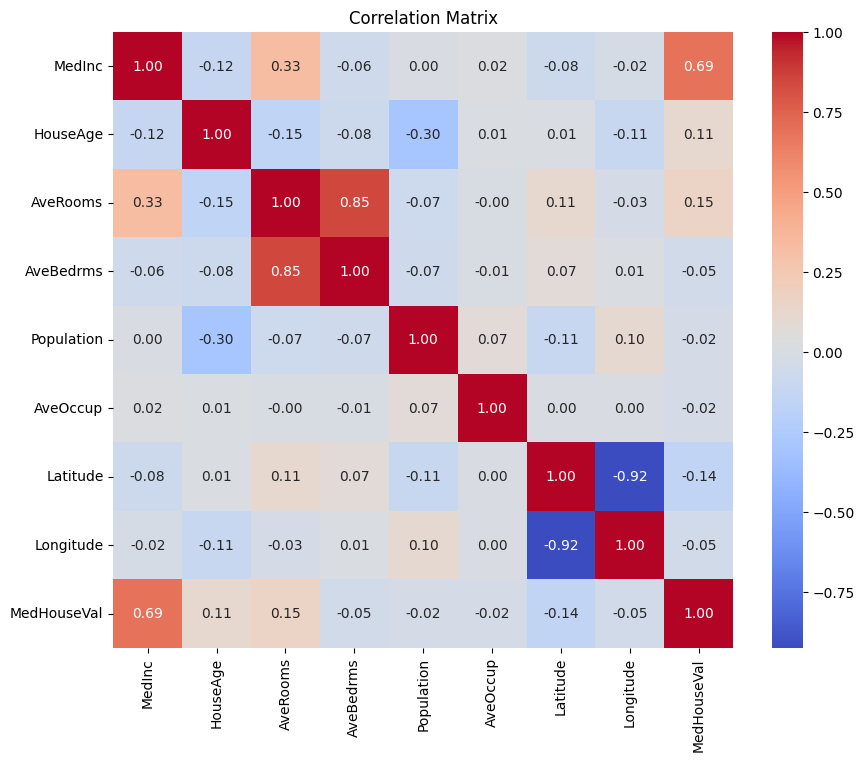

Highly correlated features:
             MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc          1.0       NaN       NaN        NaN         NaN       NaN   
HouseAge        NaN       1.0       NaN        NaN         NaN       NaN   
AveRooms        NaN       NaN       1.0        NaN         NaN       NaN   
AveBedrms       NaN       NaN       NaN        1.0         NaN       NaN   
Population      NaN       NaN       NaN        NaN         1.0       NaN   
AveOccup        NaN       NaN       NaN        NaN         NaN       1.0   
Latitude        NaN       NaN       NaN        NaN         NaN       NaN   
Longitude       NaN       NaN       NaN        NaN         NaN       NaN   
MedHouseVal     NaN       NaN       NaN        NaN         NaN       NaN   

             Latitude  Longitude  MedHouseVal  
MedInc            NaN        NaN          NaN  
HouseAge          NaN        NaN          NaN  
AveRooms          NaN        NaN          NaN  
AveBedrms         N

In [2]:

# Correlation matrix
corr_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Detect highly correlated features (threshold > 0.85)
corr_threshold = 0.85
high_corr = corr_matrix[corr_matrix.abs() > corr_threshold]
print("Highly correlated features:")
print(high_corr)
    


### Explanation:
- We use a **correlation matrix** to visualize relationships between numerical features.
- If two features are highly correlated, we can drop one of them to avoid redundancy.


## **Step 3: Handle Categorical Variables**


The **California Housing dataset** does not contain categorical variables by default, but if your dataset has 
categorical features (like neighborhood or property type), you can use one-hot encoding or target encoding as shown below.


In [3]:

# Example: One-hot encoding (if there were categorical variables)
# df = pd.get_dummies(df, columns=['some_categorical_feature'], drop_first=True)

# Example: Target encoding (for a hypothetical high-cardinality feature)
# neighborhood_avg_price = df.groupby('neighborhood')['MedHouseVal'].mean()
# df['neighborhood_encoded'] = df['neighborhood'].map(neighborhood_avg_price)

# Print a message indicating this step is skipped for California Housing
print("No categorical variables to encode in the California Housing dataset.")
    

No categorical variables to encode in the California Housing dataset.


## **Step 4: Detect and Handle Outliers**

In [4]:

# Detecting outliers using the IQR method
Q1 = df['MedHouseVal'].quantile(0.25)
Q3 = df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['MedHouseVal'] >= lower_bound) & (df['MedHouseVal'] <= upper_bound)]

print("Data after outlier removal:")
print(df.describe())
    

Data after outlier removal:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19569.000000  19569.000000  19569.000000  19569.000000  19569.000000   
mean       3.665568     28.352752      5.357548      1.096695   1442.788952   
std        1.557927     12.497772      2.294996      0.452836   1145.011369   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.522700     18.000000      4.413567      1.005894    797.000000   
50%        3.441200     28.000000      5.181818      1.048588   1181.000000   
75%        4.572100     37.000000      5.965142      1.099363   1749.000000   
max       15.000100     52.000000    132.533333     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  19569.000000  19569.000000  19569.000000  19569.000000  
mean       3.098760     35.654159   -119.562786      1.908523  
std       10.660526      2.151007      2.005764      0.954386  
min 


### Explanation:
- **IQR (Interquartile Range)** method is used to detect outliers in the `MedHouseVal` (Median House Value) column.
- We filter out rows where `MedHouseVal` is outside the IQR bounds.


## **Step 5: Create New Features**

In [5]:
df['pop_household_ratio'] = df['MedInc'] / df['HouseAge']

df['MedInc_sq'] = df['MedInc'] ** 2    

/var/folders/30/hc9ysmcs0rz72fll1lphhpp00000gp/T/ipykernel_46419/3981066421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop_household_ratio'] = df['MedInc'] / df['HouseAge']
/var/folders/30/hc9ysmcs0rz72fll1lphhpp00000gp/T/ipykernel_46419/3981066421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MedInc_sq'] = df['MedInc'] ** 2



### Explanation:
- We add **interaction features** (e.g., `MedInc / HouseAge`).
- **Polynomial features** (e.g., square of Median Income) capture non-linear relationships.


## **Step 6: Feature Selection with Variance Threshold**

In [6]:

from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.1)
X = selector.fit_transform(df.drop(['MedHouseVal'], axis=1))

print(f"Remaining features after variance thresholding: {X.shape[1]}")
    

Remaining features after variance thresholding: 9



### Explanation:
- We remove **low-variance features** that do not contribute much to the model’s performance.
- **VarianceThreshold** helps remove features with near-constant values.


## **Step 7: Model-Based Feature Importance with XGBoost**

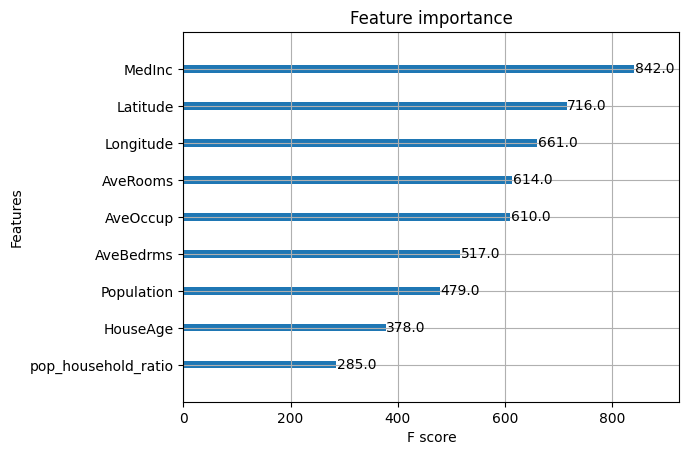

Mean Squared Error: 0.18
R^2 Score: 0.81


In [7]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(model, max_num_features=10)
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
    


### Explanation:
- We use an **XGBoost model** to train on the data and plot feature importance.
- This helps us understand which features contribute most to the prediction of house prices.


## **Step 8: Recursive Feature Elimination (RFE)**

RFE calculation is done a bit differently on every model. For example in Random Forest it uses the model's feature importance. In linear regression it uses the size of the coefficients given by linear regression.

In [9]:
%%time

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# RFE with Random Forest
selector = RFE(RandomForestRegressor(), n_features_to_select=5, step=1)

X = df.drop(columns='MedHouseVal') 
y = df['MedHouseVal']

selector = selector.fit(X, y)

# Selected features
print(f"Selected features: {X.columns[selector.support_]}")
    

Selected features: Index(['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_sq'], dtype='object')
CPU times: user 54.3 s, sys: 319 ms, total: 54.6 s
Wall time: 54.7 s



### Explanation:
- **RFE (Recursive Feature Elimination)** helps identify the most important features by recursively 
training the model and eliminating the least important ones.


## **Step 9: Summary**


In this notebook, we:
1. Loaded and inspected the California Housing dataset.
2. Performed **correlation analysis** to detect redundancy.
3. Skipped handling of categorical variables since none were present.
4. Detected and removed **outliers** using the IQR method.
5. Created new **interaction and polynomial features**.
6. Applied **Variance Threshold** to remove low-variance features.
7. Used **XGBoost** to plot feature importance.
8. Applied **RFE** to identify the most important features.

This structured workflow ensures that we handle features effectively for modeling with XGBoost.
